# Assignment 12 - Parts 2-3 Solutions

## <u>Case Study</u> Artificial Dataset

We would like to cluster the attached dataset, but we must deal with the following issues.

### Issue 1: "Working Memory Constraints"
The 30 csv files (ie. batch files) in the attached data folder each contain 100 rows of a two dimensional dataset. We would like to create an insightful clustering of the entire dataset, however, we will assume THROUGHOUT THIS WHOLE ASSIGNMENT that we can only read in one of these csvs at a time because a dataframe of 200 rows is "too large" to store in the Jupyter notebook working memory. (This is not the case, but just assume for now).

Thus, whenever you read in one of these csv files, you must either delete it or overwrite it with another, so you are not storing two or more of these datasets in your working memory at any given time.

### Issue 2: Are the batches representative?

We do not know ahead of time if each of these batches are random samples (or representative) of the whole dataset or not. We will try to figure this out in the analysis.


### Issue 3: We do not know how many clusters are in the entire dataset.

Because we cannot store the entire dataset in our Jupyter notebook working memory, we cannot use t-SNE plots on the whole dataset like we did in the past. We will try to figure this out in this analysis.

### Issue 4: We do not know the underlying clustering structure of the dataset.

Similarly, because we cannot store the entire in our Jupyter notebook working memory, we cannot use t-SNE plots on the whole dataset like we did in the past. We will try to figure this out in this analysis.


## <u>Additional Exploration:</u> sklearn
In addition, we will try to familiarize ourselves with the general structure of **sklearn** machine learning algorithms so you can learn and implement other machine learning algorithms that we will not teach you in this class.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## Sklearn Version Warning

It appears that the Sci-kit Learn version '0.24.1' may have a bug in it's Mini-Batch k-Means function. 

You can check your sklearn version using the following.

In [219]:
sklearn. __version__

'1.0.2'

To upgrade your sklearn version you can use the following command in your Anaconda command prompt.

```pip install -U scikit-learn```

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Tutorials

The tutorials below may be useful to you in the assignment.

### <u>Tutorial:</u> sklearn general algorithm stucture

In general, we can run sklearn algorithms and then extract the relevant information from the algorithm after it has been run by using the following general format.

First, we create an instance of a particular class that corresponds to an algorithm that we would like to run. When creating this instance, we usually specify additional parameters.

**Ex:** For instance, we create the 'kmeans' instance of the the KMeans class and give it the parameter n_clusters=2, indicating we would like our algorithm to find k=2 clusters.


In [220]:
import pandas as pd
df_small=pd.DataFrame({'x':[1,2,3,2,1,3], 'y':[1,7,3,2,8,9]})
df_small.head()

,x,y
0,1,1
1,2,7
2,3,3
3,2,2
4,1,8


In [221]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)

Then we can use either the **.fit()**, **.fit_predict()**, **.partial_fit()**, or **.fit_transform()** methods (some algorithms only have some of these methods) to actually run the algorithm with the given dataset.

**Ex:** For instance, we fit the 'kmeans' instance with our df_small dataframe and run the algorithm. Thus the 'kmeans' instance now will contain information about the completed algorithm.

In [222]:
kmeans.fit(df_small)

KMeans(n_clusters=2)

Then, after we have finished fitting the data and running the algorithm, we can now extract a variety of attributes that correspond to our instance that contain information from the algorithm and the results.

**Ex:** For instance, after we have run k-means with the df_small dataframe, we can extract the final cluster centroids shown below.

We can see the **.cluster_centers_** attribute listed in the sklearn Kmeans documentation listed here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [223]:
kmeans.cluster_centers_

array([[2., 2.],
       [2., 8.]])

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### <u>Tutorial:</u> Dataframe Summarization

We can summarize each of the columns in a given dataframe by using a variety of summary statistics such as those shown below.

Here's some others.

* .sum()
* .median()
* .mean()
* .std()
* .min()
* .max()
* .var()


In [224]:
import pandas as pd
df_small=pd.DataFrame({'x':[1,2,3,2,1,3], 'y':[1,7,3,2,8,9]})
df_small.head()

,x,y
0,1,1
1,2,7
2,3,3
3,2,2
4,1,8


In [225]:
df_small.sum()

x    12
y    30
dtype: int64

In [226]:
df_small.median()

x    2.0
y    5.0
dtype: float64

In [227]:
df_small.std()

x    0.894427
y    3.405877
dtype: float64

We can also turn a pandas series into an array, if we'd like.

In [228]:
df_small.std().values

array([0.89442719, 3.40587727])

We can convert arrays to lists also.

In [229]:
list(df_small.std().values)

[0.8944271909999159, 3.4058772731852804]

<hr>


### <u>Tutorial</u>: Creating an Empty Dataframe

We can create an empty dataframe by using the **pd.DataFrame()** function and supplying just the intended column names.

In [230]:
import pandas as pd
tmp1 = pd.DataFrame(columns=['x','y'])
tmp1

,x,y


### <u>Tutorial</u>:Vertically Concatenating Two Dataframes

We can concatenate two dataframes by using the **pd.concat()** function with the **axis=0** parameter.

In [231]:
tmp2 = pd.DataFrame({'x': [1,3,5,7], 'y':[9,0,-1,10]})
tmp2

,x,y
0,1,9
1,3,0
2,5,-1
3,7,10


In [232]:
pd.concat([tmp1,tmp2], axis=0)

,x,y
0,1,9
1,3,0
2,5,-1
3,7,10


### <u>Tutorial</u>:Random Sample of a Dataframe

We can randomly sample the rows of a dataframe (without replacement) by using the **.sample()** function. We can specify a random state of the sample as well as the number of rows to sample.

In [233]:
sampledf = tmp2.sample(3, random_state=100)
sampledf

,x,y
2,5,-1
1,3,0
3,7,10


### <u>Tutorial</u>:Index of a Dataframe

We can extract the index of a given dataframe by using the **.index** attribute.

In [234]:
sampledf_index = sampledf.index
sampledf_index

Int64Index([2, 1, 3], dtype='int64')

### <u>Tutorial</u>:Setting the Index of a Dataframe

When creating a dataframe, in addition to defining the columns we can also define the index values as well.

In [235]:
tmp3 = pd.DataFrame({'x': [8,9,10], 'y':[11,12,13]}, index=sampledf_index)
tmp3

,x,y
2,8,11
1,9,12
3,10,13


## Imports

In [236]:
import sklearn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch 
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import time
from scipy.spatial.distance import pdist 
import math
from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

## <u>Part 2</u>: Clustering with BIRCH

### 2.1 BIRCH Class Instantiation
First, instantiate your BIRCH model with the following specifications:
* a leaf cluster radius threshold of 0.85,
* your leaf and non-leaf nodes should have a maximum capacity of 350 entries each.

Finally, because we do not know how many clusters we want yet, we can specify **None** for the number of clusters in our function.

Call the instantiated object that you create 'birch'.

In [237]:
birch = Birch(n_clusters=None, threshold=0.2, branching_factor=350)


### 2.2 Updating the Tree with the 30 Batches
One at a time, read in each of your csv files and update your BIRCH CF tree with this batch of data. Once you are finished updating your CF tree with this dataframe, either delete it or overwrite it with the next batch.

You should act as if your Jupyter notebook environment cannot store in it's working memory two or more of these dataframes at the same time.

In [238]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Read the data into the CF tree
    temp_df=temp_df
    birch.partial_fit(temp_df)
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


<hr style="height:1px;border:none;color:#333;background-color:#333;" />


### 2.3  Leaf Subcluster Centroids

We would next like to extract the centroids of all of the subclusters represented in the entries of the leaf nodes in  our completed CF tree.

Check out the sklearn BIRCH documentation page to find out which attribute will give us this. Then use this attribute to extract the centroids.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html

In [239]:
birch.subcluster_centers_
df_subcenters = pd.DataFrame(birch.subcluster_centers_, columns = ['x1', 'x2', 'x3', 'x4', 'x5'])

df_subcenters = pd.DataFrame(birch.subcluster_centers_, index = df_subcenters.index + 1,columns = ['x1', 'x2', 'x3', 'x4', 'x5'])
df_subcenters

,x1,x2,x3,x4,x5
1,-0.548017,0.532530,-0.487659,0.250313,0.312926
2,-0.155107,0.395166,-0.025305,0.035977,0.099031
3,-0.305674,0.215491,-0.442205,-0.467968,0.269296
4,-0.822752,-0.502438,-0.121690,0.372312,0.133676
5,-0.086512,0.492471,0.268496,-0.172021,0.468730
...,...,...,...,...,...
1304,-0.251019,-0.260521,0.250074,-0.213658,0.026814
1305,-0.278832,-0.534635,0.059818,0.064679,-0.160362
1306,1.076028,0.905934,0.781155,1.386170,0.531708
1307,1.048171,1.206498,1.332782,1.392419,0.492127


### 2.4 Maximum and Minimum Final Number of Clusters

What is the maximum number of clusters that the BIRCH algorithm will be able to return to us, using the CF tree that has been built? What is the minimum number of clusters that the BIRCH algorithm will be able to return to us, using the CF tree that has been built?

*Hint: Remember that Phases 3-4 of BIRCH dictate how the final clustering of all the objects in the full dataset is achieved.*

The maximum number of clusters that the BIRCH algorithm will be able to return to us is 350, because if each leaf node is on it's own, it will point to a non-lead node that will be on its own and so forth until it points to the final clustering of 350. The minimum number of clusters that the BIRCH algorithm will be able to return is 2 clusters.

### 2.5 New BIRCH CF Tree

Next, re-instantiate your BIRCH model with the new set of specifications:
* a cluster radius threshold of .5,
* your leaf and non-leaf nodes should have a maximum capacity of 350 each,
* indicating **None** for the number of clusters.

Then, again, one at a time, read in each of your csv files and update your BIRCH CF tree with this batch of data. Once you are finished updating your CF tree with this dataframe, either delete it or overwrite it.

Then finally, extract the new set of centroids of all of the subclusters represented in the entries of the leaf nodes in  our completed CF tree.


In [240]:
birch = Birch(n_clusters=None, threshold=0.5, branching_factor=350)


In [241]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Read the data into the CF tree
    temp_df=temp_df
    birch.partial_fit(temp_df)
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


In [242]:
birch.subcluster_centers_
df_subcenters = pd.DataFrame(birch.subcluster_centers_, columns = ['x1', 'x2', 'x3', 'x4', 'x5'])

df_subcenters = pd.DataFrame(birch.subcluster_centers_, index = df_subcenters.index + 1,columns = ['x1', 'x2', 'x3', 'x4', 'x5'])
df_subcenters

,x1,x2,x3,x4,x5
1,-0.180605,0.319008,-0.543165,0.175291,0.106865
2,-0.060773,0.277553,0.148754,-0.148626,-0.176682
3,0.175601,0.060551,-0.374349,-0.124565,-0.170889
4,-0.105901,-0.357869,-0.043573,-0.214677,0.042108
5,-0.243314,0.321394,-0.142282,-0.168830,0.255927
...,...,...,...,...,...
114,2.629328,3.305017,2.334707,2.476104,3.161235
115,2.823264,2.647862,2.691910,2.190681,1.688613
116,3.067629,2.452982,2.971767,3.667209,2.145534
117,3.082446,3.297221,3.460792,2.078955,2.333212


### 2.6 Maximum Final Number of Clusters
What is the maximum number of clusters that the BIRCH algorithm will be able to produce using the CF tree that you have built?

The maximum number of clusters that the BIRCH algorithm will be able to produce using the CF tree that you have built is 3000 clusters.

In [243]:
actual_labels=[]
predicted_labels=[]
for i in range(0, 30):
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Get actual and predicted cluster labels for each object
    temp_df=temp_df
    predicted_labels+=list(birch.predict(temp_df))
del temp_df

len(predicted_labels)

3000

### 2.7 t-SNE Plots of the CF Tree Leaf Subcluster Centroids

Put these centroids into a dataframe, and create 6 t-SNE plots of this centroid dataset (using 6 different perplexity values and two random states for each of these perplexity values).

In [244]:
df_subcenters

,x1,x2,x3,x4,x5
1,-0.180605,0.319008,-0.543165,0.175291,0.106865
2,-0.060773,0.277553,0.148754,-0.148626,-0.176682
3,0.175601,0.060551,-0.374349,-0.124565,-0.170889
4,-0.105901,-0.357869,-0.043573,-0.214677,0.042108
5,-0.243314,0.321394,-0.142282,-0.168830,0.255927
...,...,...,...,...,...
114,2.629328,3.305017,2.334707,2.476104,3.161235
115,2.823264,2.647862,2.691910,2.190681,1.688613
116,3.067629,2.452982,2.971767,3.667209,2.145534
117,3.082446,3.297221,3.460792,2.078955,2.333212


No handles with labels found to put in legend.


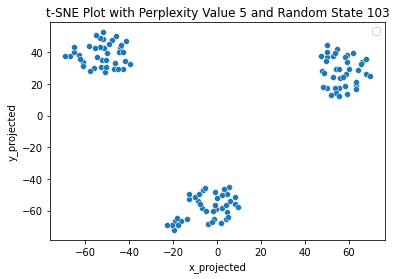

No handles with labels found to put in legend.


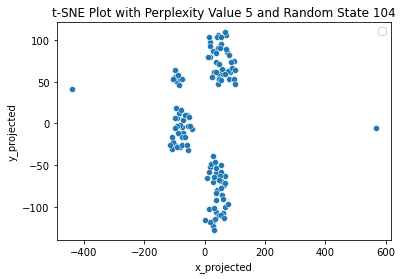

--------------------------------------------


No handles with labels found to put in legend.


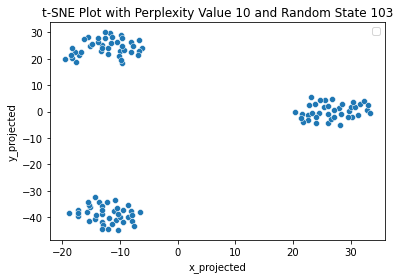

No handles with labels found to put in legend.


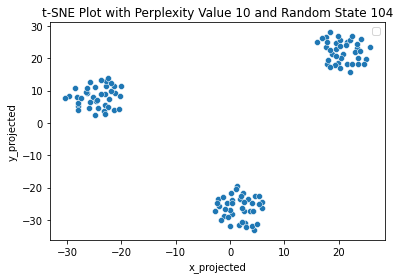

--------------------------------------------


No handles with labels found to put in legend.


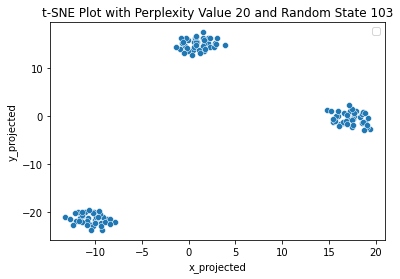

No handles with labels found to put in legend.


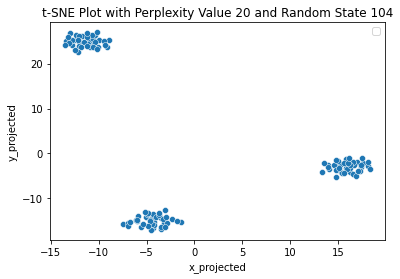

--------------------------------------------


No handles with labels found to put in legend.


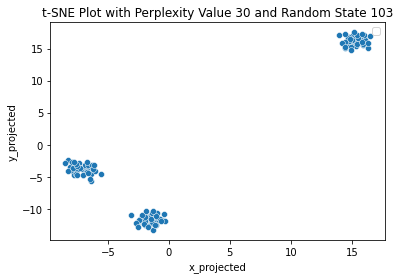

No handles with labels found to put in legend.


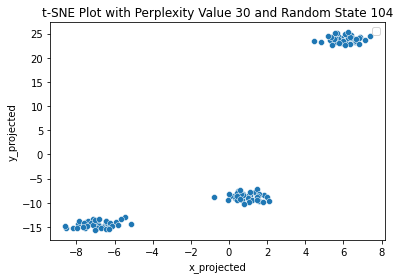

--------------------------------------------


No handles with labels found to put in legend.


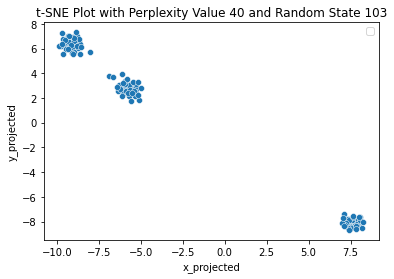

No handles with labels found to put in legend.


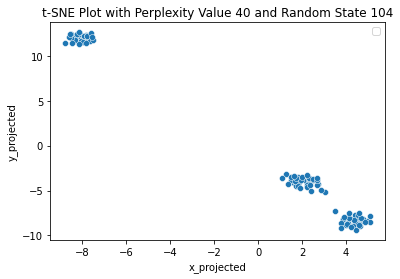

--------------------------------------------


No handles with labels found to put in legend.


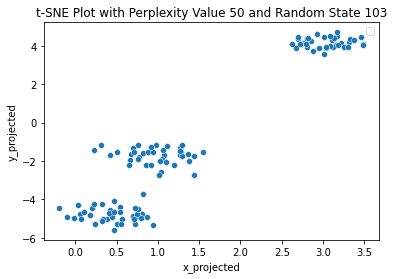

No handles with labels found to put in legend.


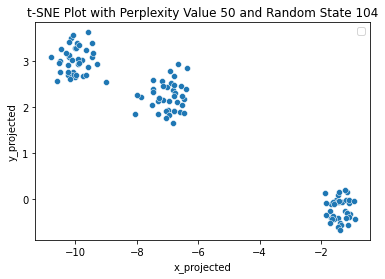

--------------------------------------------


In [245]:
for perp in [5,10, 20, 30, 40, 50]: 
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df_subcenters)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        sns.scatterplot(x='x_projected',y='y_projected', palette=sns.color_palette("husl", 10), data=df_tsne)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

### 2.8 t-SNE Centroid Plot Interpretation

#### Information about Phase 3 and Phase 4 of the BIRCH algorithm (in sklearn implementation)

Phase 3 and Phase 4 of the BIRCH algorithm (in sklearn implementation) do the following.

1. First it applies hierarchical agglomerative clustering with Ward's linkage to cluster all of the leaf entry centroids to create a dendrogram of centroids.

2. Then, if you requested BIRCH to return k clusters, it then extracts the centroid clustering from the dendrogram with k clusters.

3. It then takes the mean of each of these k clusters in this clustering, producing k final/new centroids.

4. Finally, it can cluster an **object** from your dataset by assigning it to the closest final/new centroid from (3) above.


#### Use your t-SNE plots and the information above to answer the following questions.

1. We plan to run BIRCH one more time, using the same parameters, except now we would also like to specify a number of clusters k to return. How many should we request? Explain.


2. Will the shapes of centroid clusters work well for an algorithm such as hierarchical agglomerative clustering with Ward's linkage? Explain.


3. How many clusters do you think exist in the full dataset?

1. We should request 3 clusters (k=3) because we can see 3 distinct clusters from the t-SNE plots across all perplexity values.

2. Yes, it will work well for an algorithm such as hierarchical agglomerative clustering with Ward's linkage because the TSNE plots show spherical clusters which are also well-defined and well-seperated. 

3. In the full dataset, I think there are 3 clusters due to what the t-SNE plot indicates.

### 2.9 Final BIRCH CF Tree - Informed by the Cluster Number

Now, re-instantiate your BIRCH model again with the new set of specifications:
* a cluster radius threshold of .5,
* your leaf and non-leaf nodes should have a maximum capacity of 350 each,
* using the number of clusters that you selected in 2.8.

Then, again, one at a time, read in each of your csv files and update your BIRCH CF tree with this batch of data. Once you are finished updating your CF tree with this dataframe, either delete it or overwrite it.




In [246]:
birch = Birch(n_clusters=3, threshold=0.5, branching_factor=350)

In [247]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Read the data into the CF tree
    temp_df=temp_df
    birch.partial_fit(temp_df)
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


### 2.10 Getting the Cluster Labels of the Objects in the Full Dataset

Finally after you have completed fitting your CF tree, one at a time, read in each of your csv files into a temporary dataframe and do the following.
   1. For each of these dataframes, get a list of predicted cluster labels (from BIRCH).
   2. Save each of these predicted cluster labels and put them in a list.
    
Your final result of this step, should be a single list of 3000 cluster labels of all of the 3000 objects in the dataset.

In [248]:
actual_labels=[]
predicted_labels=[]
for i in range(0, 30):
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Get actual and predicted cluster labels for each object
    temp_df=temp_df
    predicted_labels+=list(birch.predict(temp_df))
del temp_df

In [249]:
len(predicted_labels)

3000

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## <u> Part 3</u> Determining if the batches are random

Remember, we don't know whether or not these batches were random. Let's try to figure this out.

### 3.1 Random or Non-Random Batches?

Determine if the the data in each of the batches is representative of the whole dataset. Remember, you can only read in a batch one at a time and must delete it or overwrite it before loading in another.

In [250]:
# we want to first load in a batch, then score how well a k-means clustering does compared to the predicted labels from the t-SNE plot
# to test how random the batch sizes are

acc = []

In [251]:
for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data 
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    km = KMeans(n_clusters=3, random_state=100)
    pred = km.fit_predict(temp_df)
    birch_pred = predicted[(0 + i*100):(100 + i*100)]
    acc.append(adjusted_rand_score(pred, birch_pred))
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


In [252]:
acc

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00501225078666219,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

K-means did poorly because the random scores are composed of mostly 0's. Thus the batches are not random because else the random scores would be much higher.

## 4. Initial Implementation of Mini-Batch k-Means

In this analysis, we will read in each of the 30 csv data batches into the mini-batch k-means algorithm. 

### 4.1. Reassignment Ratio

In #3.1 above, we determined whether our batches were representative (or randomly samples) of the full dataset.

Given what we discovered in #3.1, should we set our reassignment ratio to be higher or lower in the Mini-Batch k-Means algorithm? Explain.

We should set our reassignment ration to be higher in the Mini-Batch k-Means algorithm because we need to reassign more of the data for randomization.

### 4.2 Algorithm Instantiation

Now, instantiate your Mini-Batch k-Means model with the following specifications:
* the number of clusters you determined in #2.8
* a re-assignment ratio of 0.4
* a random state of 100.

In [253]:
kmeans = MiniBatchKMeans(n_clusters=3, random_state=100, reassignment_ratio = 0.4)

### 4.3. Reading in the Batches

Then, one at a time, read in each of your csv files and update the mini-batch k-means algorithm with this batch of data. Once you are finished updating the algorithm with this dataframe, either delete it or overwrite it.

In [254]:
import warnings
warnings.filterwarnings("ignore")

for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
    #Read the data into the CF tree
    temp_df=temp_df
    birch.partial_fit(temp_df)
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


### 4.4. Random Sample of the Full Dataset

Ideally, we would like to collect a random sample of size 180 from the full dataset. One at a time, for each of the csv batches, do the following.
* Read in the csv into a dataframe.
* Collect a random sample of 6 observtions from this dataframe (without replacement), using a random state of 100 for each sample.
* Concatenate this random sample dataframe to a "total sample dataframe" which will eventually contain 180 observations (= your 30 random samples of size 6).

Once you are finished with a given batch dataframe, either delete it or overwrite it.

Show your "total sample dataframe" below.

**Note: For now we will assume that our Jupyter notebook can handle our final random sample dataframe of 180 observations and a batch dataframe of 100 observations.**

In [255]:
df = pd.DataFrame([], columns=["x1", "x2", "x3", "x4", "x5"])

for i in range(0, 30):
    print('Clustering Batch:', i)
    #Read the batch of data 
    temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    sample = temp_df.sample(6, random_state=100)
    df = pd.concat([df, sample], axis=0)
del temp_df

Clustering Batch: 0
Clustering Batch: 1
Clustering Batch: 2
Clustering Batch: 3
Clustering Batch: 4
Clustering Batch: 5
Clustering Batch: 6
Clustering Batch: 7
Clustering Batch: 8
Clustering Batch: 9
Clustering Batch: 10
Clustering Batch: 11
Clustering Batch: 12
Clustering Batch: 13
Clustering Batch: 14
Clustering Batch: 15
Clustering Batch: 16
Clustering Batch: 17
Clustering Batch: 18
Clustering Batch: 19
Clustering Batch: 20
Clustering Batch: 21
Clustering Batch: 22
Clustering Batch: 23
Clustering Batch: 24
Clustering Batch: 25
Clustering Batch: 26
Clustering Batch: 27
Clustering Batch: 28
Clustering Batch: 29


### 4.5. Cluster Labels for your Random Sample

Next, get the mini-batch k-means cluster labels for each of the 180 observations in your "total sample dataframe."

In [260]:
kmeans.fit(df)
label = kmeans.predict(df)

### 4.6. t-SNE Algorithm

Finally, using 6 different perplexity values and at least two random states for each perplexity value, map your random sample of 180 observations onto a two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random states and perplexity value. Color code the points in your t-SNE plots by the mini-batch k-means cluster labels.

**Important Hint:**
The output of **tsne.fit_transform()** is a numpy array. So normally when we have created t-SNE plots in the past, we have converted this numpy array into a dataframe by using the **pd.DataFrame()** function. When you do this, you should set the index of this dataframe to be the same as the index of your 'total sample dataframe'.

```pd.DataFrame( ...  , index = total_sample_df.index)```

Without doing this, when we would have tried to concatenate our t-SNE coordinates dataframe with our 'total sample dataframe' we would have had a problem, because the indexes of the two dataframes would not have matched. This is because the indexes of the 'total sample dataframe' have been reordered.

No handles with labels found to put in legend.


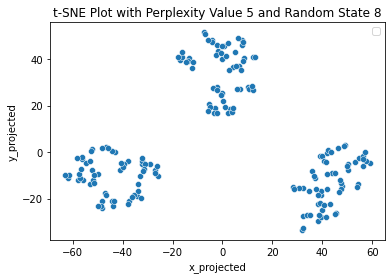

No handles with labels found to put in legend.


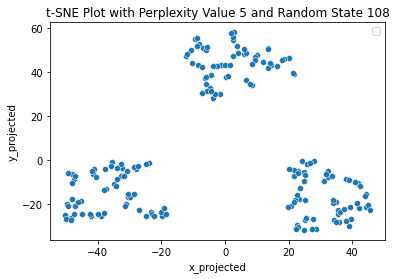

--------------------------------------------


No handles with labels found to put in legend.


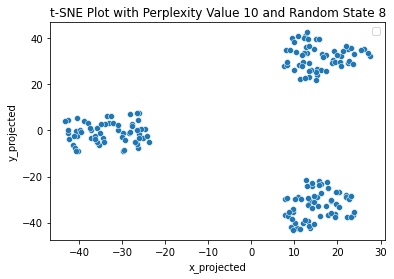

No handles with labels found to put in legend.


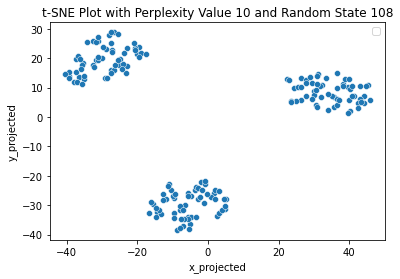

--------------------------------------------


No handles with labels found to put in legend.


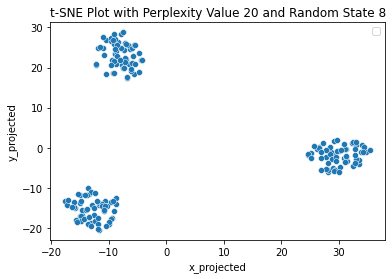

No handles with labels found to put in legend.


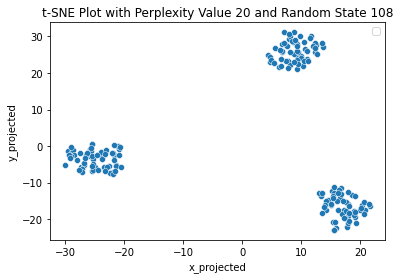

--------------------------------------------


No handles with labels found to put in legend.


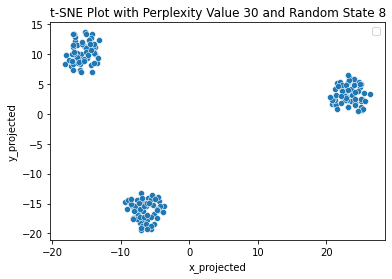

No handles with labels found to put in legend.


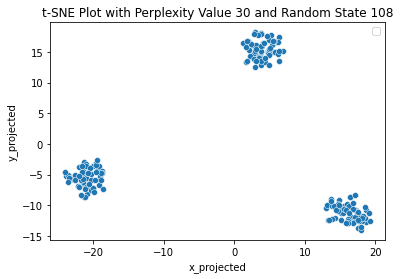

--------------------------------------------


No handles with labels found to put in legend.


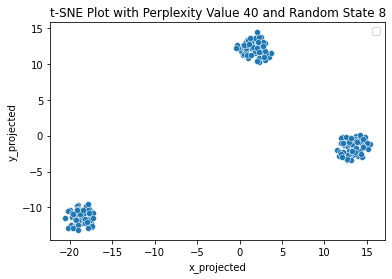

No handles with labels found to put in legend.


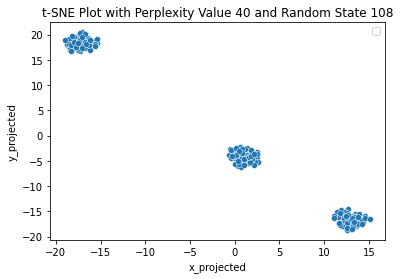

--------------------------------------------


No handles with labels found to put in legend.


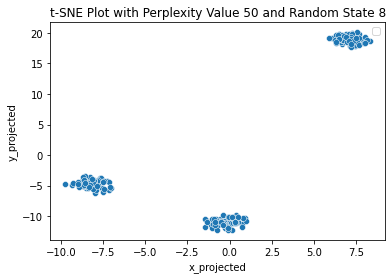

No handles with labels found to put in legend.


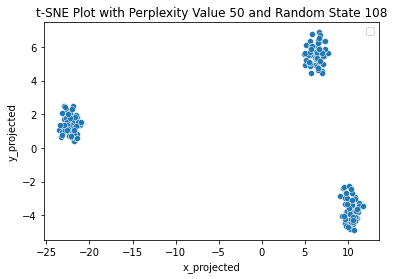

--------------------------------------------


In [261]:
for perp in [5,10, 20, 30, 40, 50]: 
    for rs in [8,108]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'], index=df.index)
        sns.scatterplot(x='x_projected',y='y_projected', palette=sns.color_palette("husl", 10), data=df_tsne)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

### 4.7. t-SNE Plot Interpretation

Use your t-SNE plots above to answer the following questions.

1. How many clusters does the t-SNE plot above suggest are in the random sample of 180 observations?
2. To what extent did the results of our mini-batch k-means algorithm agree with the clustering structure suggested by the t-SNE plots above? Explain.

Choose a random state and perplexity value that best reflects what you answered in 4.6 above and show this plot below.

1. The t-SNE plot above suggest that there are 3 clusters in the random sample of 180 observations.
2. The results of our mini-batch k-means agree with the BIRCH clustering since the t-SNE plots are very similar with 3 clusters.

No handles with labels found to put in legend.


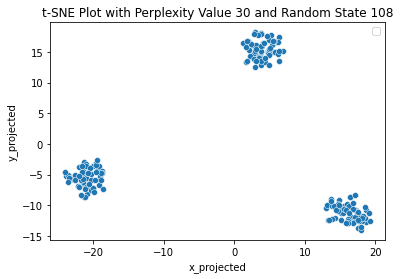

In [263]:
perp, rs = 30, 108

tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'], index=df.index)
sns.scatterplot(x='x_projected',y='y_projected', palette=sns.color_palette("husl", 10), data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## 5. Parameter Selection for Mini-Batch k-means

### 5.1. Testing out Reassignment Ratios

Next, we would like to see if we can select a reassignment ratio in which the mini-batch k-means cluster labels will agree *more* with the clusters suggested by the t-SNE plots.

Using the following reassignment ratios (0.01, 0.1, 0.2, 0.4, and 0.8) do the following:
1. Instantiate mini-batch k-means with:
    * the number of clusters you found in 4.7
    * a batch size of 100
    * the reassignment ratio that you are considering
    * a random state of 100
2. Read in each of the 30 csv batches and fit that given mini-batch k-means class that you instantiated with each of these batches one at a time. Again, make sure that you delete or overwrite a batch dataframe when you are done with it.
3. Using your final fitted mini-batch k-means results for that given reassignment ratio, get the cluster labels for your total random sample of 180 observations.
4. Plot your t-SNE plot of this total random sample, color coding your points by the given cluster labels.

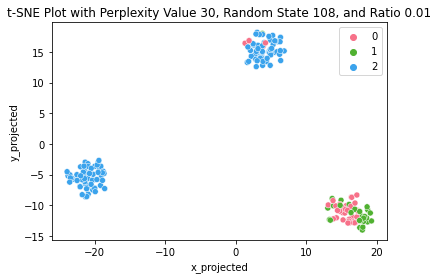

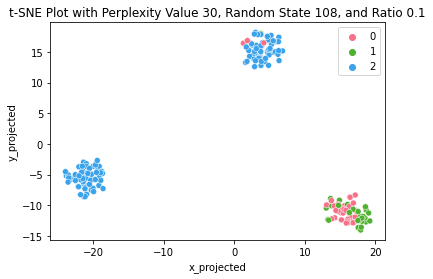

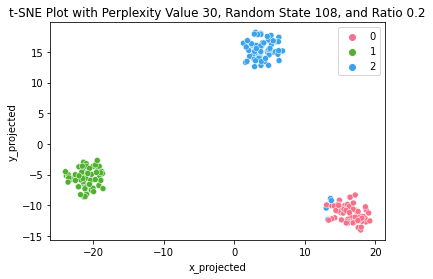

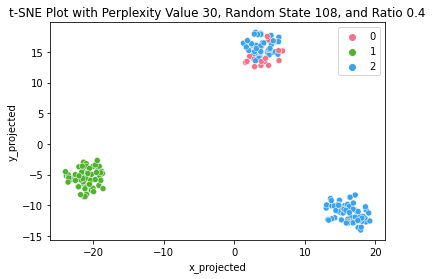

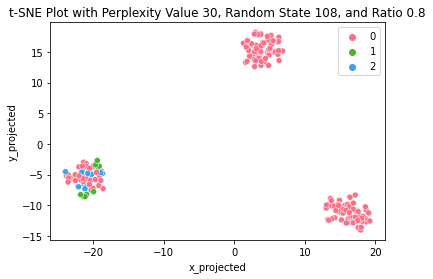

In [269]:
ratios = [0.01, 0.1, 0.2, 0.4, 0.8]
for r in ratios:
    kmeans = MiniBatchKMeans(n_clusters=3, random_state=100, reassignment_ratio = r, batch_size=100)
    df = pd.DataFrame([], columns=["x1", "x2", "x3", "x4", "x5"])
    for i in range(0, 30):
        #Read the batch of data 
        temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
        kmeans.partial_fit(temp_df)
    
    for i in range(0, 30):
        #Read the batch of data
        temp_df=pd.read_csv('data/batch_%s.csv'%str(i))
    
        #Read the data into the CF tree
        sample = temp_df.sample(6, random_state=100)
        df = pd.concat([df, sample], axis=0)
    del temp_df

    labels = kmeans.predict(df)
    
    tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
    data_tsne = tsne.fit_transform(df)
    df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'], index=df.index)
    df_tsne['label'] = labels
    sns.scatterplot(x='x_projected',y='y_projected', hue = 'label', palette=sns.color_palette("husl", 3), data=df_tsne)
    plt.title('t-SNE Plot with Perplexity Value %s, Random State %s, and Ratio %s' %(perp, rs, r))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    del df

### 5.2. Selecting a Reassignment Ratio

Of the reassignment ratios that you considered, which reassignment ratio produced clustering results that had the most amount of agreement with the clustering structure suggested by your t-SNE plot?

Reassignment ratio 0.2 produced clustering results with 3 distinct clusters that had the most amount of agreement with the clustering structure suggested by your t-SNE plot

## Note: 
There are several cluster evaluation metrics that you *could* calculate for this whole clustering while still only being able to have one batch loaded in the working memory at any given time. For instance, the Calinski-Harabasz score could be calculated in this way.

I'm not expecting you to do this, but if you plan on clustering larger datasets that don't completely fit into your computational environment, it is also useful to think about how you would efficiently determine the cohesion and separation of this clustering without needing to load the whole dataset into the computational environment all at once.